In [1]:
import ptychoSampling.farfield.analysis_scripts.analysis_utils as anut
import ptychoSampling.farfield.analysis_scripts.combined_analysis_utils as cbut
from copy import deepcopy
import matplotlib.pyplot as plt
import numpy as np
import ptychoSampling.farfield.analysis_scripts.latex_output_utils as ltxut
from ptychoSampling.farfield.analysis_scripts.lines_keys import colors, markers, linestyles
import ptychoSampling.farfield.analysis_scripts.plot_params as params
from ptychoSampling.farfield.analysis_scripts.plot_utils import xy, getData, PlotData, _plotObjAmpl, _plotObjPhase
import matplotlib as mpl
from matplotlib.ticker import ScalarFormatter, NullFormatter
import os
import dill
import string

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
locations = ['poisson_1e3','poisson_1e4', 'poisson_1e6']
base_paths = [f'/raid/home/skandel/code/ptychoSampling_v2/experiments/farfield/{loc}' for loc in locations]
data_paths = [f'{p}/figures/' for p in base_paths]

In [4]:
fluences = {37.9: r'$\overline{n}_{low}$', 379: r'$\overline{n}_{mod}$', 37900:r'$\overline{n}_{high}$'}

In [5]:
spr_g_suffix = params.suffixes["spr"]["gaussian"]
g_pickles = [f'{v}{spr_g_suffix}' for v in ['spr_obj_error_gaussian', 'spr_flops_gaussian']]

In [6]:
g_dats = []
for d in data_paths:
    dats_this = []
    for p in g_pickles:
        fname = f'{d}/{p}.pkl'
        with open(fname, 'rb') as f:
            dats_this.append(dill.load(f))
    g_dats.append(dats_this)

In [7]:
list(fluences.items())

[(37.9, '$\\overline{n}_{low}$'),
 (379, '$\\overline{n}_{mod}$'),
 (37900, '$\\overline{n}_{high}$')]

LM-A /raid/home/skandel/code/ptychoSampling_v2/experiments/farfield/poisson_1e3/lma_linesearch_efficient_gaussian_data.pkl
1.145674228668213
LM-A /raid/home/skandel/code/ptychoSampling_v2/experiments/farfield/poisson_1e4/lma_linesearch_efficient_gaussian_data.pkl
1.0706113576889038
LM-A /raid/home/skandel/code/ptychoSampling_v2/experiments/farfield/poisson_1e6/lma_linesearch_efficient_gaussian_data.pkl
1.000707983970642


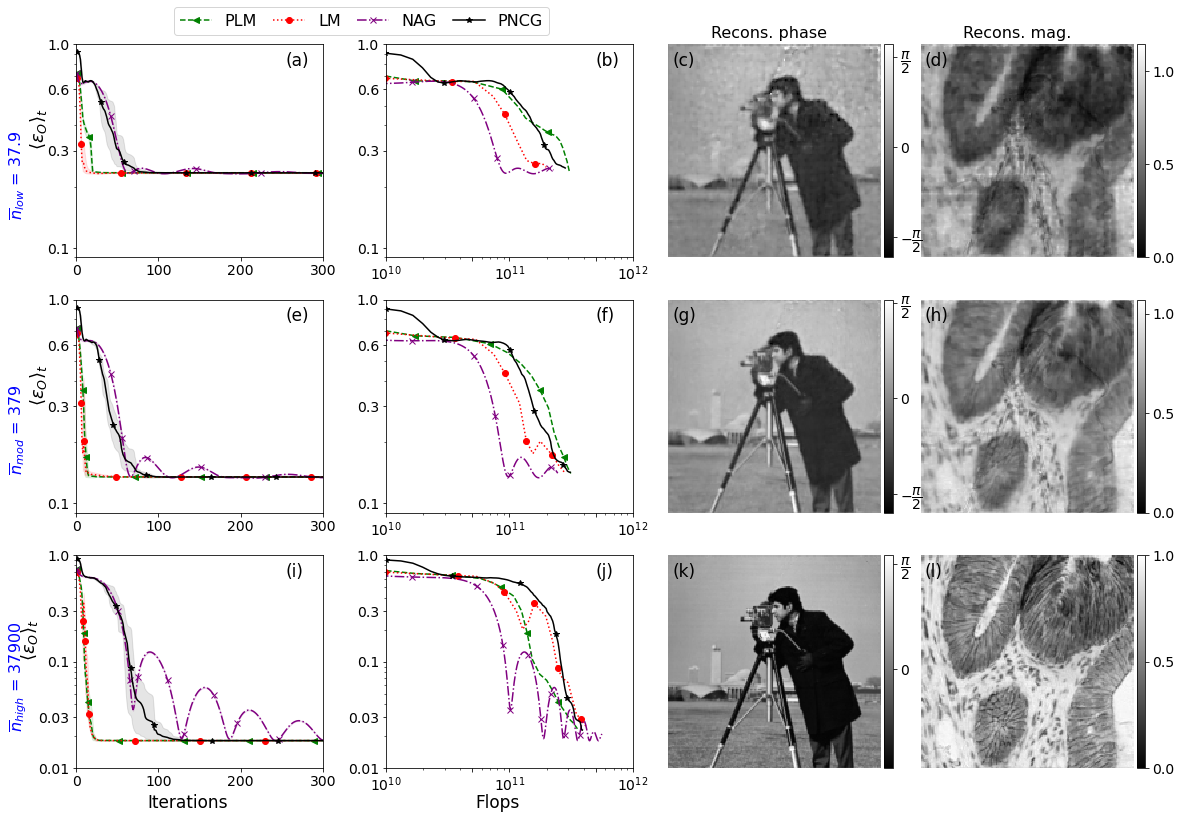

In [23]:
fig, axes = plt.subplots(3, 4, figsize=[16,11], constrained_layout=True)

for i, (fnum, flabel) in enumerate(fluences.items()):
    for j, d in enumerate(g_dats[i]):
        
        for l, (x, y) in enumerate(d.xys):
            k = d.keys[l]
            
            axes[i, j].plot(x, y, markevery=0.2, color=colors[k], ls=linestyles[k], marker=markers[k], label=d.labels[l])
            if len(d.lows) > 0:
                axes[i, j].fill_between(x, d.lows[l][:x.size], d.highs[l][:x.size], color=colors[k], alpha=0.1)

        #if d.yscale != '':
        #    axes[i, j].set_yscale(d.yscale)
        if d.xscale != '':
            axes[i, j].set_xscale(d.xscale)
        #axes[i, j].set_ylim(d.ylim)
        #axes[i, j].set_yticks(d.yticks, minor=False)
        
        axes[i,j].set_yscale('log')
        axes[i,j].yaxis.set_major_formatter(ScalarFormatter())
        axes[i,j].yaxis.set_minor_formatter(NullFormatter())
        if i == 2:
            
            axes[i,j].set_yticks([0.01, 0.03, 0.1, 0.3, 1.0], minor=False)
            axes[i,j].set_yticklabels([0.01, 0.03, 0.1, 0.3, 1.0])
            axes[i,j].set_ylim([0.01, 1.0])
        else: 
            axes[i,j].set_yticks([0.1, 0.3, 0.6, 1.0], minor=False)
            axes[i,j].set_yticklabels([0.1, 0.3, 0.6, 1.0])
            
            axes[i,j].set_ylim([0.09, 1.0])
        #axes[i,j].set_yticks([])

        
        
        axes[i, j].set_xlim(d.xlim)
        axes[i, j].set_xticks(d.xticks, minor=False)
        #axes[i, j].tick_params(axis='x', labelrotation=-15)
        axes[i, j].tick_params(which='both', labelsize=14)

        #legend = axes[i, j].legend(loc='best', fontsize=13, ncol=3)
        #legend.set_title(r'$\log_{10}(\beta)$', prop={'size':14})
        if axes[i,j].is_first_col():
            fluence_str = f'{flabel} = {fnum}'
            axes[i,j].annotate(fluence_str, xy=(-0.28, 0.2), xycoords='axes fraction',
                               fontsize=16, color='blue', rotation=90)  
            axes[i, j].set_ylabel(r'$\langle \epsilon_O\rangle_t$', fontsize=18, labelpad=-2, y=0.6)
        if axes[i,j].is_last_row():
            if j == 0:
                axes[i, j].set_xlabel('Iterations', fontsize=17)
                axes[i, j].xaxis.set_label_coords(0.45,-0.12)
            elif j == 1:
                axes[i, j].set_xlabel('Flops', fontsize=17)
                axes[i, j].xaxis.set_label_coords(0.45,-0.12)
        
        axes[i, j].text(0.85, 0.9, '(' + string.ascii_lowercase[i * 4 + j] + ')', transform=axes[i, j].transAxes, 
                        size=17)
    base_path = base_paths[i]
    data_fname_dict = {'LM-A': f'{base_path}/lma_linesearch_efficient_gaussian_data.pkl'}
    objs_all = getData(data_fname_dict, False)
    mean_obj_plma = objs_all['PLM-A'].mean(axis=0)
    _plotObjAmpl(np.abs(mean_obj_plma), axes[i, 3])
    
    angles = np.angle(mean_obj_plma)
    angles = angles - np.mean(angles)
    _plotObjPhase(angles, axes[i,2])
    
    axes[i, 2].text(0.02, 0.9, '(' + string.ascii_lowercase[i * 4 + 2] + ')', transform=axes[i, 2].transAxes, 
                        size=17)
    axes[i, 3].text(0.02, 0.9, '(' + string.ascii_lowercase[i * 4 + 3] + ')', transform=axes[i, 3].transAxes, 
                        size=17)
    
axes[0, 2].text(0.2, 1.03, 'Recons. phase', transform=axes[0, 2].transAxes, 
                        size=16) 
axes[0, 3].text(0.2, 1.03, 'Recons. mag.', transform=axes[0, 3].transAxes, 
                        size=16) 
handles, labels = axes[0,0].get_legend_handles_labels()
legend = fig.legend(handles, labels, bbox_to_anchor=(0.48, 1.03),  ncol=4, fontsize=16, columnspacing=1)

#plt.subplots_adjust(top=0.95, bottom=0.1, left=0.1, right=0.9, hspace=0.2,
#                    wspace=0.25)
#plt.tight_layout(h_pad=0, w_pad=0)
plt.savefig('spr_gaussian.pdf', bbox_inches='tight')

LM-A /raid/home/skandel/code/ptychoSampling_v2/experiments/farfield/poisson_1e3/lma_linesearch_efficient_gaussian_data.pkl
1.145674228668213
LM-A /raid/home/skandel/code/ptychoSampling_v2/experiments/farfield/poisson_1e4/lma_linesearch_efficient_gaussian_data.pkl
1.0706113576889038
LM-A /raid/home/skandel/code/ptychoSampling_v2/experiments/farfield/poisson_1e6/lma_linesearch_efficient_gaussian_data.pkl
1.000707983970642


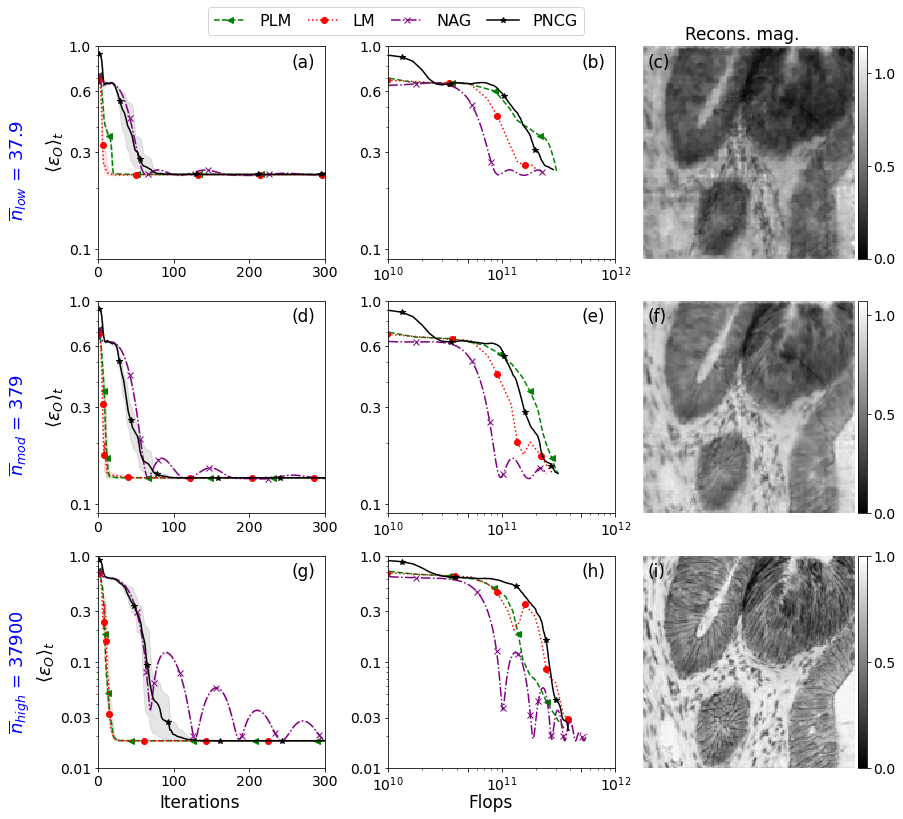

In [22]:
fig, axes = plt.subplots(3, 3, figsize=[12,11], constrained_layout=True)

for i, (fnum, flabel) in enumerate(fluences.items()):
    for j, d in enumerate(g_dats[i]):
        for l, (x, y) in enumerate(d.xys):
            k = d.keys[l]
            
            axes[i, j].plot(x, y, markevery=0.2, color=colors[k], ls=linestyles[k], marker=markers[k], label=d.labels[l])
            if len(d.lows) > 0:
                axes[i, j].fill_between(x, d.lows[l][:x.size], d.highs[l][:x.size], color=colors[k], alpha=0.1)

        #if d.yscale != '':
        #    axes[i, j].set_yscale(d.yscale)
        if d.xscale != '':
            axes[i, j].set_xscale(d.xscale)
        #axes[i, j].set_ylim(d.ylim)
        #axes[i, j].set_yticks(d.yticks, minor=False)
        
        axes[i,j].set_yscale('log')
        axes[i,j].yaxis.set_major_formatter(ScalarFormatter())
        axes[i,j].yaxis.set_minor_formatter(NullFormatter())
        if i == 2:
            
            axes[i,j].set_yticks([0.01, 0.03, 0.1, 0.3, 1.0], minor=False)
            axes[i,j].set_yticklabels([0.01, 0.03, 0.1, 0.3, 1.0])
            axes[i,j].set_ylim([0.01, 1.0])
        else: 
            axes[i,j].set_yticks([0.1, 0.3, 0.6, 1.0], minor=False)
            axes[i,j].set_yticklabels([0.1, 0.3, 0.6, 1.0])
            
            axes[i,j].set_ylim([0.09, 1.0])
        #axes[i,j].set_yticks([])

        
        
        axes[i, j].set_xlim(d.xlim)
        axes[i, j].set_xticks(d.xticks, minor=False)
        #axes[i, j].tick_params(axis='x', labelrotation=-15)
        axes[i, j].tick_params(which='both', labelsize=14)

        #legend = axes[i, j].legend(loc='best', fontsize=13, ncol=3)
        #legend.set_title(r'$\log_{10}(\beta)$', prop={'size':14})
        if axes[i,j].is_first_col():
            fluence_str = f'{flabel} = {fnum}'
            axes[i,j].annotate(fluence_str, xy=(-0.4, 0.2), xycoords='axes fraction',
                               fontsize=18, color='blue', rotation=90) 
            axes[i, j].set_ylabel(r'$\langle \epsilon_O\rangle_t$', fontsize=18)
        if axes[i,j].is_last_row():
            if j == 0:
                axes[i, j].set_xlabel('Iterations', fontsize=17)
                axes[i, j].xaxis.set_label_coords(0.45,-0.12)
            elif j == 1:
                axes[i, j].set_xlabel('Flops', fontsize=17)
                axes[i, j].xaxis.set_label_coords(0.45,-0.12)
                
        axes[i, j].text(0.85, 0.9, '(' + string.ascii_lowercase[i * 3 + j] + ')', transform=axes[i, j].transAxes, 
                        size=17)
    base_path = base_paths[i]
    data_fname_dict = {'LM-A': f'{base_path}/lma_linesearch_efficient_gaussian_data.pkl'}
    objs_all = getData(data_fname_dict, False)
    mean_obj_plma = objs_all['PLM-A'].mean(axis=0)
    _plotObjAmpl(np.abs(mean_obj_plma), axes[i, 2])
    axes[i, 2].text(0.02, 0.9, '(' + string.ascii_lowercase[i * 3 + 2] + ')', transform=axes[i, 2].transAxes, 
                        size=17)
    
axes[0, 2].text(0.2, 1.03, 'Recons. mag.', transform=axes[0, 2].transAxes, 
                        size=17) 
handles, labels = axes[0,0].get_legend_handles_labels()
legend = fig.legend(handles, labels, bbox_to_anchor=(0.68, 1.03),  ncol=4, fontsize=16, columnspacing=1)
#plt.subplots_adjust(top=0.95, bottom=0.1, left=0.1, right=0.9, hspace=0.2,
#                    wspace=0.25)
#plt.tight_layout(h_pad=0, w_pad=0)
plt.savefig('spr_gaussian.pdf', bbox_inches='tight')

LM-A /raid/home/skandel/code/ptychoSampling_v2/experiments/farfield/poisson_1e3/lma_gaussian_data.pkl


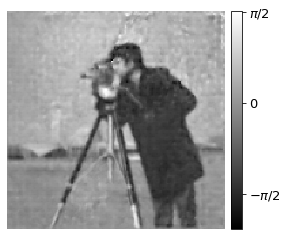

In [11]:
base_path = base_paths[0]
data_fname_dict = {'LM-A': f'{base_path}/lma_gaussian_data.pkl'}
objs_all, probes_all = getData(data_fname_dict)
mean_obj_plmas = objs_all['PLM-A'].mean(axis=0)
ax = plt.subplot(1,1,1)
cax = plt.pcolormesh(np.angle(mean_obj_plmas), cmap='gray')
cbar = plt.colorbar(cax, pad=0.02)
cbar.set_ticks([-np.pi,-np.pi/2, 0, np.pi/2, np.pi])
cbar.set_ticklabels([r'$-\pi$', r'$-\pi/2$',r'$0$',r'$\pi/2$',r'$\pi$',])
#cmap='gray')  # , vmin=-np.pi, vmax=np.pi)
#    cax.axes.set_axis_off()
#    cb = plt.colorbar(cax, pad=0.02)
    # cb = plt.colorbar(cax, ticks=[-np.pi, 0, np.pi], pad=0.02)
    # cb.ax.set_yticklabels([r'$-\pi/2$', r'0', r'$\pi/2$'])
cbar.ax.tick_params(labelsize=13)
ax.set_aspect('equal')
ax.axes.set_axis_off()

In [24]:
del g_dats, objs_all, probes_all, data_fname_dict, mean_obj_plma

# Plotting the poisson data

In [25]:
spr_p_suffix = params.suffixes["spr"]["poisson"]
p_pickles = [f'{v}{spr_p_suffix}' for v in ['spr_obj_error_poisson', 'spr_flops_poisson']]

In [26]:
p_dats = []
for d in data_paths:
    dats_this = []
    for p in p_pickles:
        fname = f'{d}/{p}.pkl'
        with open(fname, 'rb') as f:
            dats_this.append(dill.load(f))
    p_dats.append(dats_this)

LM-A-S /raid/home/skandel/code/ptychoSampling_v2/experiments/farfield/poisson_1e3/lma_linesearch_efficient_tol2_poisson_surrogate_data.pkl
1.6037566661834717
LM-A-S /raid/home/skandel/code/ptychoSampling_v2/experiments/farfield/poisson_1e4/lma_linesearch_efficient_tol2_poisson_surrogate_data.pkl
1.2154611349105835
LM-A-S /raid/home/skandel/code/ptychoSampling_v2/experiments/farfield/poisson_1e6/lma_linesearch_efficient_tol2_poisson_surrogate_data.pkl
1.0595993995666504


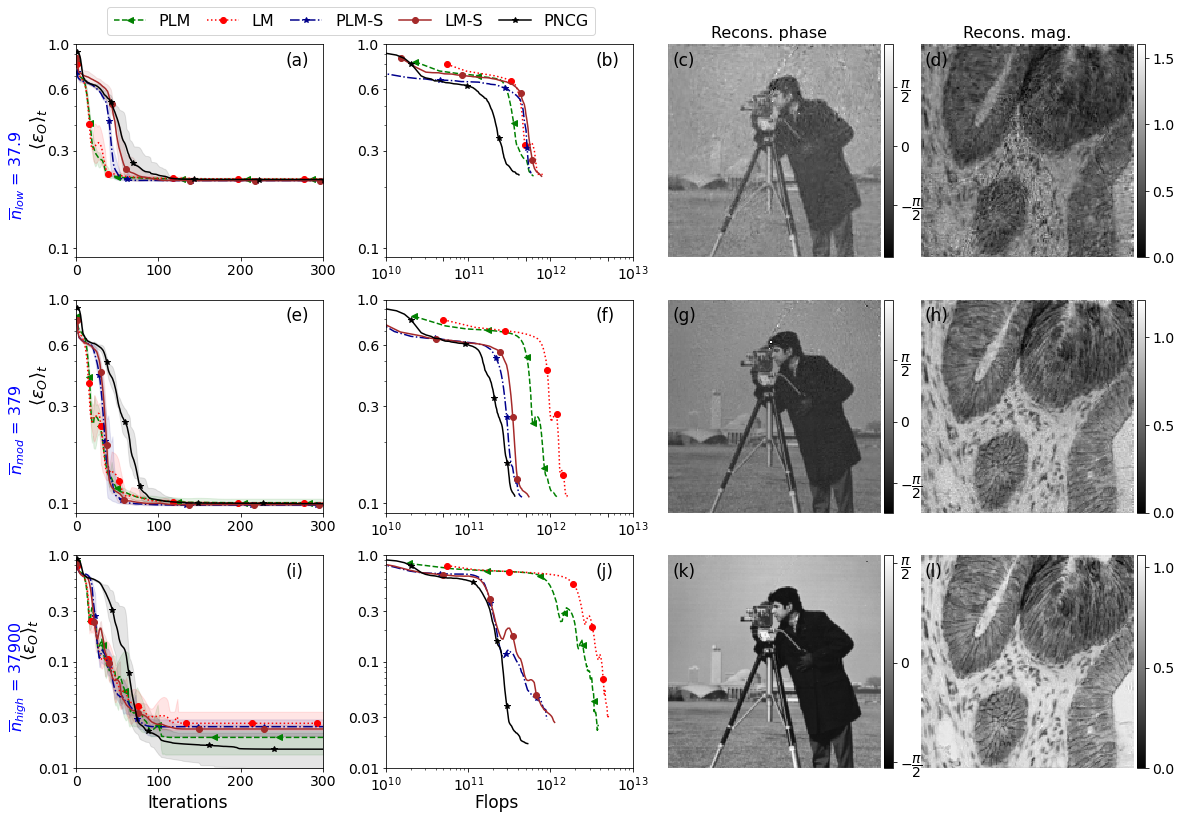

In [31]:
fig, axes = plt.subplots(3, 4, figsize=[16,11], constrained_layout=True)

for i, (fnum, flabel) in enumerate(fluences.items()):
    for j, d in enumerate(p_dats[i]):
        
        for l, (x, y) in enumerate(d.xys):
            k = d.keys[l]
            
            axes[i, j].plot(x, y, markevery=0.2, color=colors[k], ls=linestyles[k], marker=markers[k], label=d.labels[l])
            if len(d.lows) > 0:
                axes[i, j].fill_between(x, d.lows[l][:x.size], d.highs[l][:x.size], color=colors[k], alpha=0.1)

        #if d.yscale != '':
        #    axes[i, j].set_yscale(d.yscale)
        if d.xscale != '':
            axes[i, j].set_xscale(d.xscale)
        #axes[i, j].set_ylim(d.ylim)
        #axes[i, j].set_yticks(d.yticks, minor=False)
        
        axes[i,j].set_yscale('log')
        axes[i,j].yaxis.set_major_formatter(ScalarFormatter())
        axes[i,j].yaxis.set_minor_formatter(NullFormatter())
        if i == 2:
            
            axes[i,j].set_yticks([0.01, 0.03, 0.1, 0.3, 1.0], minor=False)
            axes[i,j].set_yticklabels([0.01, 0.03, 0.1, 0.3, 1.0])
            axes[i,j].set_ylim([0.01, 1.0])
        else: 
            axes[i,j].set_yticks([0.1, 0.3, 0.6, 1.0], minor=False)
            axes[i,j].set_yticklabels([0.1, 0.3, 0.6, 1.0])
            
            axes[i,j].set_ylim([0.09, 1.0])
        #axes[i,j].set_yticks([])

        
        
        axes[i, j].set_xlim(d.xlim)
        axes[i, j].set_xticks(d.xticks, minor=False)
        #axes[i, j].tick_params(axis='x', labelrotation=-15)
        axes[i, j].tick_params(which='both', labelsize=14)

        #legend = axes[i, j].legend(loc='best', fontsize=13, ncol=3)
        #legend.set_title(r'$\log_{10}(\beta)$', prop={'size':14})
        if axes[i,j].is_first_col():
            fluence_str = f'{flabel} = {fnum}'
            axes[i,j].annotate(fluence_str, xy=(-0.28, 0.2), xycoords='axes fraction',
                               fontsize=16, color='blue', rotation=90)  
            axes[i, j].set_ylabel(r'$\langle \epsilon_O\rangle_t$', fontsize=18, labelpad=-2, y=0.6)
        if axes[i,j].is_last_row():
            if j == 0:
                axes[i, j].set_xlabel('Iterations', fontsize=17)
                axes[i, j].xaxis.set_label_coords(0.45,-0.12)
            elif j == 1:
                axes[i, j].set_xlabel('Flops', fontsize=17)
                axes[i, j].xaxis.set_label_coords(0.45,-0.12)
        
        axes[i, j].text(0.85, 0.9, '(' + string.ascii_lowercase[i * 4 + j] + ')', transform=axes[i, j].transAxes, 
                        size=17)
    base_path = base_paths[i]
    data_fname_dict = {'LM-A-S': f'{base_path}/lma_linesearch_efficient_tol2_poisson_surrogate_data.pkl'}
    objs_all = getData(data_fname_dict, False)
    mean_obj_plmas = objs_all['PLM-A-S'].mean(axis=0)
    _plotObjAmpl(np.abs(mean_obj_plmas), axes[i, 3], ampl_ticks=[0, 0.5, 1.0, 1.5])
    
    angles = np.angle(mean_obj_plmas)
    angles = angles - np.mean(angles)
    _plotObjPhase(angles, axes[i,2])
    
    axes[i, 2].text(0.02, 0.9, '(' + string.ascii_lowercase[i * 4 + 2] + ')', transform=axes[i, 2].transAxes, 
                        size=17)
    axes[i, 3].text(0.02, 0.9, '(' + string.ascii_lowercase[i * 4 + 3] + ')', transform=axes[i, 3].transAxes, 
                        size=17)
    
axes[0, 2].text(0.2, 1.03, 'Recons. phase', transform=axes[0, 2].transAxes, 
                        size=16) 
axes[0, 3].text(0.2, 1.03, 'Recons. mag.', transform=axes[0, 3].transAxes, 
                        size=16) 
handles, labels = axes[0,0].get_legend_handles_labels()
legend = fig.legend(handles, labels, bbox_to_anchor=(0.52, 1.03),  ncol=5, fontsize=16, columnspacing=1)

#plt.subplots_adjust(top=0.95, bottom=0.1, left=0.1, right=0.9, hspace=0.2,
#                    wspace=0.25)
#plt.tight_layout(h_pad=0, w_pad=0)
plt.savefig('spr_poisson.pdf', bbox_inches='tight')

LM-A /raid/home/skandel/code/ptychoSampling_v2/experiments/farfield/poisson_1e3/lma_linesearch_efficient_tol2_poisson_surrogate_data.pkl
LM-A /raid/home/skandel/code/ptychoSampling_v2/experiments/farfield/poisson_1e4/lma_linesearch_efficient_tol2_poisson_surrogate_data.pkl
LM-A /raid/home/skandel/code/ptychoSampling_v2/experiments/farfield/poisson_1e6/lma_linesearch_efficient_tol2_poisson_surrogate_data.pkl


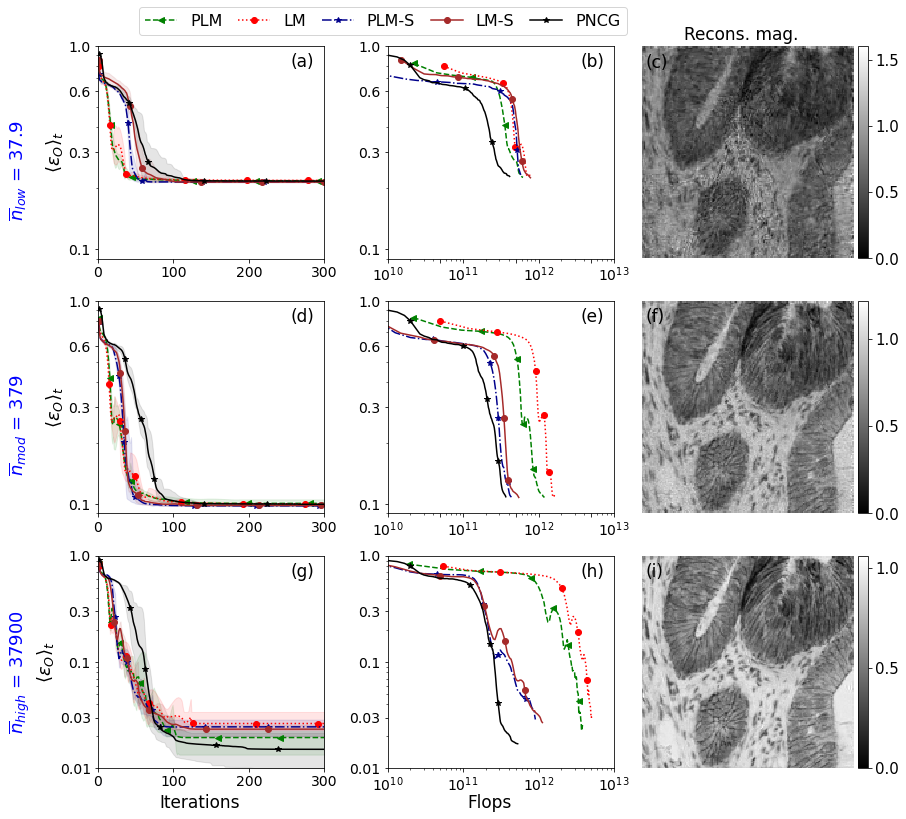

In [14]:
fig, axes = plt.subplots(3, 3, figsize=[12,11], constrained_layout=True)

for i, (fnum, flabel) in enumerate(fluences.items()):
    for j, d in enumerate(p_dats[i]):
        for l, (x, y) in enumerate(d.xys):
            k = d.keys[l]
            
            axes[i, j].plot(x, y, markevery=0.2, color=colors[k], ls=linestyles[k], marker=markers[k], label=d.labels[l])
            if len(d.lows) > 0:
                axes[i, j].fill_between(x, d.lows[l][:x.size], d.highs[l][:x.size], color=colors[k], alpha=0.1)

        #if d.yscale != '':
        #    axes[i, j].set_yscale(d.yscale)
        if d.xscale != '':
            axes[i, j].set_xscale(d.xscale)
        #axes[i, j].set_ylim(d.ylim)
        #axes[i, j].set_yticks(d.yticks, minor=False)
        
        axes[i,j].set_yscale('log')
        axes[i,j].yaxis.set_major_formatter(ScalarFormatter())
        axes[i,j].yaxis.set_minor_formatter(NullFormatter())
        if i == 2:
            
            axes[i,j].set_yticks([0.01, 0.03, 0.1, 0.3, 1.0], minor=False)
            axes[i,j].set_yticklabels([0.01, 0.03, 0.1, 0.3, 1.0])
            axes[i,j].set_ylim([0.01, 1.0])
        else: 
            axes[i,j].set_yticks([0.1, 0.3, 0.6, 1.0], minor=False)
            axes[i,j].set_yticklabels([0.1, 0.3, 0.6, 1.0])
            
            axes[i,j].set_ylim([0.09, 1.0])
        #axes[i,j].set_yticks([])

        
        
        axes[i, j].set_xlim(d.xlim)
        axes[i, j].set_xticks(d.xticks, minor=False)
        #axes[i, j].tick_params(axis='x', labelrotation=-15)
        axes[i, j].tick_params(which='both', labelsize=14)

        #legend = axes[i, j].legend(loc='best', fontsize=13, ncol=3)
        #legend.set_title(r'$\log_{10}(\beta)$', prop={'size':14})
        if axes[i,j].is_first_col():
            fluence_str = f'{flabel} = {fnum}'
            axes[i,j].annotate(fluence_str, xy=(-0.4, 0.2), xycoords='axes fraction',
                               fontsize=18, color='blue', rotation=90) 
            axes[i, j].set_ylabel(r'$\langle \epsilon_O\rangle_t$', fontsize=18)
        if axes[i,j].is_last_row():
            if j == 0:
                axes[i, j].set_xlabel('Iterations', fontsize=17)
                axes[i, j].xaxis.set_label_coords(0.45,-0.12)
            elif j == 1:
                axes[i, j].set_xlabel('Flops', fontsize=17)
                axes[i, j].xaxis.set_label_coords(0.45,-0.12)
        
        axes[i, j].text(0.85, 0.9, '(' + string.ascii_lowercase[i * 3 + j] + ')', transform=axes[i, j].transAxes, 
                        size=17)
    base_path = base_paths[i]
    data_fname_dict = {'LM-A': f'{base_path}/lma_linesearch_efficient_tol2_poisson_surrogate_data.pkl'}
    objs_all = getData(data_fname_dict, False)
    mean_obj_plma = objs_all['PLM-A'].mean(axis=0)
    _plotObjAmpl(np.abs(mean_obj_plma), axes[i, 2], ampl_ticks=[0, 0.5, 1.0, 1.5])
    axes[i, 2].text(0.02, 0.9, '(' + string.ascii_lowercase[i * 3 + 2] + ')', transform=axes[i, 2].transAxes, 
                        size=17)
    
axes[0, 2].text(0.2, 1.03, 'Recons. mag.', transform=axes[0, 2].transAxes, 
                        size=17) 
handles, labels = axes[0,0].get_legend_handles_labels()
legend = fig.legend(handles, labels, bbox_to_anchor=(0.73, 1.03),  ncol=5, fontsize=16, columnspacing=1)
#handles, labels = axes[0,0].get_legend_handles_labels()
#legend = fig.legend(handles, labels, bbox_to_anchor=(0.75, 1.06),  ncol=5, fontsize=17)
#plt.subplots_adjust(top=0.95, bottom=0.1, left=0.1, right=0.9, hspace=0.2,
#                    wspace=0.25)
#plt.tight_layout(h_pad=0, w_pad=0)
plt.savefig('spr_poisson.pdf', bbox_inches='tight')

LM-A-S /raid/home/skandel/code/ptychoSampling_v2/experiments/farfield/poisson_1e3/lma_linesearch_tol2_poisson_surrogate_data.pkl


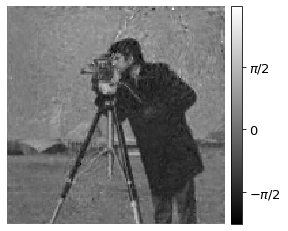

In [16]:
base_path = base_paths[0]
data_fname_dict = {'LM-A-S': f'{base_path}/lma_linesearch_tol2_poisson_surrogate_data.pkl'}
objs_all, probes_all = getData(data_fname_dict)
mean_obj_plmas = objs_all['PLM-A-S'].mean(axis=0)
ax = plt.subplot(1,1,1)
cax = plt.pcolormesh(np.angle(mean_obj_plmas), cmap='gray')
cbar = plt.colorbar(cax, pad=0.02)
cbar.set_ticks([-np.pi,-np.pi/2, 0, np.pi/2, np.pi])
cbar.set_ticklabels([r'$-\pi$', r'$-\pi/2$',r'$0$',r'$\pi/2$',r'$\pi$',])
#cmap='gray')  # , vmin=-np.pi, vmax=np.pi)
#    cax.axes.set_axis_off()
#    cb = plt.colorbar(cax, pad=0.02)
    # cb = plt.colorbar(cax, ticks=[-np.pi, 0, np.pi], pad=0.02)
    # cb.ax.set_yticklabels([r'$-\pi/2$', r'0', r'$\pi/2$'])
cbar.ax.tick_params(labelsize=13)
ax.set_aspect('equal')
ax.axes.set_axis_off()